## Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
1) Determine el espacio de configuraciones, en los ejes $(x,\omega)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.




In [1]:
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def EDO(y,t):
    x,v= y
    m=0.2
    k=1
    dydt=[v,-np.sqrt(k/m)*x]
    return dydt

In [3]:
#Condiciones iniciales
yo=[2,0]
Time=np.linspace(0,15,100)
Sol=integrate.odeint(EDO,yo,Time)

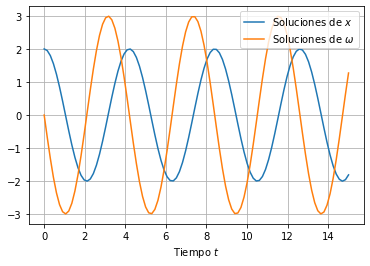

In [4]:
X=Sol[0:,0]
V=Sol[0:,1]
plt.plot(Time,X, label='Soluciones de $x$')
plt.plot(Time,V, label='Soluciones de $ω$')
plt.xlabel('Tiempo $t$')
plt.grid()
plt.legend()
plt.show()

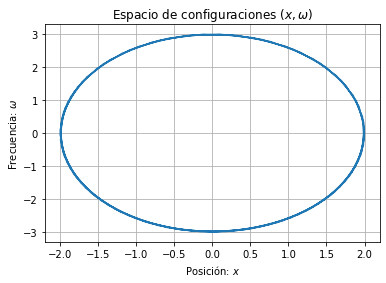

In [5]:
#espacio de configuraciones
plt.plot(X,V)
plt.xlabel('Posición: $x$')
plt.ylabel('Frecuencia: $ω$')
plt.grid()
plt.title('Espacio de configuraciones $(x,ω)$')
plt.show()

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [6]:
df=pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')

#Cambiar el nombre de las columnas para evitar errores en el uso de la columna N(t)
df.rename(columns={'t':'t',
                  'N(t)':'N'},
                   inplace=True)
df

,t,N
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [7]:
def Dec(t, λ):
    N0=1000
    return N0*np.e**(-t*λ)


In [8]:
a,Δa=optimize.curve_fit(Dec,df.t[1:], df.N[1:])

In [9]:

print('Constante de decaimiento: ', a[0], '±', np.sqrt(Δa)[0])

#Agregando los datos de N(t) fiteados al dataframe para usarlos en el plot.

N_fit=Dec(df.t,*a)
df['N_fit']=Dec(df.t,*a)
df

Constante de decaimiento:  0.02476264854561326 ± [0.00037163]


,t,N,N_fit
0,0,1000,1000.000000
1,10,809,780.651474
2,22,564,579.970367
3,33,480,441.680989
4,40,370,371.388742
5,50,285,289.925169
6,60,199,226.330510
7,70,169,176.685246
8,80,131,137.929598
9,99,101,86.164053


In [10]:
#Valor de la vida media

τ = np.log(2)/a

#Error de una medida indirecta Δy = |df/dx| * Δx

#--->|     df/dx      | * Δx    
Δτ = (np.log(2)/(a**2)) * Δa

print('La vida media es: ', τ[0], '±', Δτ[0])

La vida media es:  27.991641495179937 ± [0.00015612]


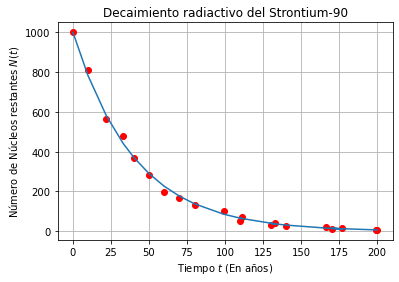

In [11]:
plt.plot(df.t, df.N, 'ro')
plt.plot(df.t, df.N_fit)
plt.xlabel('Tiempo $t$ (En años)')
plt.ylabel('Número de Núcleos restantes $N(t)$')
plt.grid()
plt.title('Decaimiento radiactivo del Strontium-90')
plt.show()